In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Outcome = 1 Diabet/Şeker Hastası
# Outcome = 0 Sağlıklı

data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


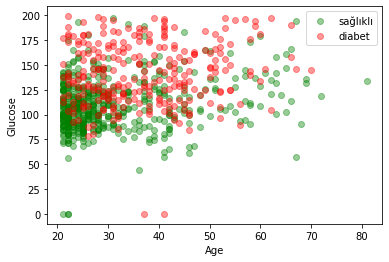

In [2]:
diabets_patient = data[data.Outcome == 1]
healty = data[data.Outcome == 0]

# Glikoza bakarak çizim yapma

plt.scatter(healty.Age, healty.Glucose, color='green', label='sağlıklı', alpha=0.4)
plt.scatter(diabets_patient.Age, diabets_patient.Glucose, color='red', label='diabet', alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()

In [3]:
# x ve y eksenleri

y = data.Outcome.values
x_ham_veri = data.drop(["Outcome"], axis=1)

# Outcome sütununu(dependent variable) çıkarıp sadece independent variable bırakıyoruz
# Çünkü KNN algoritması x değerleri içerisinde gruplandırma yapacak

# normalization yapıyoruz -xhamveri içerisindeki değerleri sadece 0ve1 arasında olacak şekilde güncelliyoruz
# Eğer bu şekilde yapmazsak yüksek rakamlar küçük rakamları ezer ve KNN algoritması yanılabilir.

x = (x_ham_veri - np.min(x_ham_veri)) / (np.max(x_ham_veri) - np.min(x_ham_veri))

# Önce 
print("Normalization öncesi ham veriler: \n")
print(x_ham_veri.head())

#sonra
print("Normalization sonrası veriler: \n")
print(x.head())

Normalization öncesi ham veriler: 

   Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0            6      148             72  ...  33.6                     0.627   50
1            1       85             66  ...  26.6                     0.351   31
2            8      183             64  ...  23.3                     0.672   32
3            1       89             66  ...  28.1                     0.167   21
4            0      137             40  ...  43.1                     2.288   33

[5 rows x 8 columns]
Normalization sonrası veriler: 

   Pregnancies   Glucose  ...  DiabetesPedigreeFunction       Age
0     0.352941  0.743719  ...                  0.234415  0.483333
1     0.058824  0.427136  ...                  0.116567  0.166667
2     0.470588  0.919598  ...                  0.253629  0.183333
3     0.058824  0.447236  ...                  0.038002  0.000000
4     0.000000  0.688442  ...                  0.943638  0.200000

[5 rows x 8 columns]


In [4]:
# train datamız ile test datamızı ayırıyoruz
# train datamız sistemin sağlıklı insan ile hasta insan ayırt etmesi için
# test datamız makine öğrenme modelimiz doğru bir şekilde çalışıyor mu

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
# 768 hastadan %20 si test için 
# random_state random olarak seç 

#kNN modeli

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print("K=3 için Test Verilerimiz Doğrulama Testi Sonucu: ",knn.score(x_test, y_test))

K=3 için Test Verilerimiz Doğrulama Testi Sonucu:  0.7857142857142857


In [5]:
# k kaç olmalı?
# en iyi K değerini belirleyelim 

for k in range(1,11):
    knn_yeni = KNeighborsClassifier(n_neighbors=k)
    knn_yeni.fit(x_train, y_train)
    print(k," ","Doğruluk Oranı: %", knn_yeni.score(x_test, y_test)*100)

1   Doğruluk Oranı: % 69.48051948051948
2   Doğruluk Oranı: % 74.02597402597402
3   Doğruluk Oranı: % 78.57142857142857
4   Doğruluk Oranı: % 75.97402597402598
5   Doğruluk Oranı: % 79.87012987012987
6   Doğruluk Oranı: % 79.22077922077922
7   Doğruluk Oranı: % 81.16883116883116
8   Doğruluk Oranı: % 79.22077922077922
9   Doğruluk Oranı: % 78.57142857142857
10   Doğruluk Oranı: % 79.22077922077922
